In [2]:
import math
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")

df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
# Zeit in MS
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)

# Löscht Blinzeln
df = df[(df["Gaze Y"] < 1030) == True].reset_index()

# Generiert Geschwindigkeit (Nicht Fertig)
df_rad = pd.DataFrame({'rad/s':[]})
for i in range(len(df)):
    try:
        j = i + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        calc = np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X']) ** 2 + (df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X']) ** 2) / t
        df_rad = df_rad.append({'rad/s':calc},ignore_index=True)
    except IndexError:
        pass
df['rad/s'] = df_rad

# Generiert Fixiation
try:
    del df_test
    del f
except NameError:
    pass
df_fix = pd.DataFrame({'Fixation':[]})
f = 1
for i in range(len(df)):
    try:
        j = i + 1
        k = j + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        if np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X'])** 2)  < 20 and np.sqrt((df.iloc[i]['Gaze Y'] - df.iloc[j]['Gaze Y'])** 2)  < 20:
            df_fix = df_fix.append({'Fixation':f},ignore_index=True).astype(int)
        else:
            df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
            if np.sqrt((df.iloc[j]['Gaze X'] - df.iloc[k]['Gaze X'])** 2)  < 20 and np.sqrt((df.iloc[j]['Gaze Y'] - df.iloc[k]['Gaze Y'])** 2)  < 20:
                f += 1
            else: pass
    except IndexError:
        df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
df['Fixation'] = df_fix['Fixation']
df['Fixation'] = df['Fixation'].astype(int)

df
#df.to_csv("test_test.csv")
#df["Gaze Y"][1773:2324].mean()

index  Index   Timestamp  Gaze X  Gaze Y  Lost Track  \
0         29     29    0.577272    1318     998         NaN   
1         30     30    0.596290    1318     998         NaN   
2         31     31    0.616308    1318     998         NaN   
3         32     32    0.636325    1330    1003         NaN   
4         33     33    0.655343    1329    1014         NaN   
...      ...    ...         ...     ...     ...         ...   
15264  15878  15878  328.102475    1316     589         NaN   
15265  15879  15879  328.122494    1314     581         NaN   
15266  15880  15880  328.144421    1316     581         NaN   
15267  15881  15881  328.165344    1320     572         NaN   
15268  15882  15882  328.185908    1320     572         NaN   

                    Confidence  Timestamp in ms       rad/s  Fixation  
0      TrackingConfidence.HIGH              577    0.000000         1  
1      TrackingConfidence.HIGH              596    0.000000         1  
2      TrackingConfidence.HIGH              616  847.791174         1  
3      TrackingConfidence.HIGH              636   74.362100         1  
4      TrackingConfidence.HIGH              655    0.000000         1  
...                        ...              ...         ...       ...  
15264  TrackingConfidence.HIGH           328102  141.281702      2384  
15265  TrackingConfidence.HIGH           328122  128.997806      2384  
15266  TrackingConfidence.HIGH           328144  270.366653      2384  
15267  TrackingConfidence.HIGH           328165    0.000000      2384  
15268  TrackingConfidence.HIGH           328185         NaN         0  

[15269 rows x 10 columns]

In [132]:
try:
    del df_test
except NameError:
    pass

df_test = pd.DataFrame({'rad/s':[]})
for i in range(len(df)):
    try:
        j = i + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        calc = np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X'])** 2 + (df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X']) ** 2) / t
        df_test = df_test.append({'rad/s':calc},ignore_index=True)
    except IndexError:
        pass

df_test



/var/folders/cj/wn8qt5n91ll6brp5_dgtt0l80000gn/T/ipykernel_24724/4171462504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'rad/s':calc},ignore_index=True)
/var/folders/cj/wn8qt5n91ll6brp5_dgtt0l80000gn/T/ipykernel_24724/4171462504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'rad/s':calc},ignore_index=True)
/var/folders/cj/wn8qt5n91ll6brp5_dgtt0l80000gn/T/ipykernel_24724/4171462504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_test.append({'rad/s':calc},ignore_index=True)
/var/folders/cj/wn8qt5n91ll6brp5_dgtt0l80000gn/T/ipykernel_24724/4171462504.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

rad/s
0        0.000000
1        0.000000
2      847.791174
3       74.362100
4        0.000000
...           ...
15263    0.000000
15264  141.281702
15265  128.997806
15266  270.366653
15267    0.000000

[15268 rows x 1 columns]

In [129]:
df

Index   Timestamp  Gaze X  Gaze Y  Lost Track               Confidence  \
29        29    0.577272    1318     998         NaN  TrackingConfidence.HIGH   
30        30    0.596290    1318     998         NaN  TrackingConfidence.HIGH   
31        31    0.616308    1318     998         NaN  TrackingConfidence.HIGH   
32        32    0.636325    1330    1003         NaN  TrackingConfidence.HIGH   
33        33    0.655343    1329    1014         NaN  TrackingConfidence.HIGH   
...      ...         ...     ...     ...         ...                      ...   
15878  15878  328.102475    1316     589         NaN  TrackingConfidence.HIGH   
15879  15879  328.122494    1314     581         NaN  TrackingConfidence.HIGH   
15880  15880  328.144421    1316     581         NaN  TrackingConfidence.HIGH   
15881  15881  328.165344    1320     572         NaN  TrackingConfidence.HIGH   
15882  15882  328.185908    1320     572         NaN  TrackingConfidence.HIGH   

       Timestamp in ms       rad/s  
29                 577    0.000000  
30                 596  176.243271  
31                 616  749.127877  
32                 636    0.000000  
33                 655  692.187536  
...                ...         ...  
15878           328102         NaN  
15879           328122         NaN  
15880           328144         NaN  
15881           328165         NaN  
15882           328185         NaN  

[15269 rows x 8 columns]

/var/folders/cj/wn8qt5n91ll6brp5_dgtt0l80000gn/T/ipykernel_24724/2424564336.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df = test_df.append({'Sakkaden':np.sqrt((df.iloc[3145]['Gaze X'] - df.iloc[3146]['Gaze X']) ** 2 + (df.iloc[3145]['Gaze X'] - df.iloc[3146]['Gaze X']) ** 2)},ignore_index=True)


Sakkaden
0       0.0

1856    367
1857    367
1858    365
1859    365
1860    359
       ... 
2411    553
2412    553
2413    553
2414    555
2415    549
Name: Gaze Y, Length: 551, dtype: int64

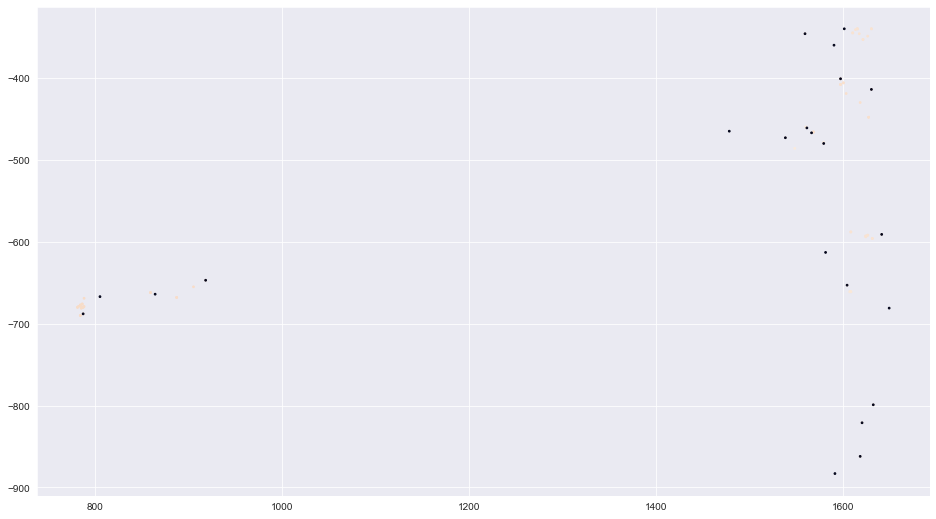

In [161]:
x = df["Gaze X"][3000:3100]
y = df["Gaze Y"][3000:3100] * -1
z = df['Fixation'][3000:3100]
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
#plt.axis([2000,0,-1100,0])
plt.scatter(x,y, s = 3, c=z)
plt.show()

In [29]:
np.sqrt((df.iloc[3456]['Gaze X'] - df.iloc[3457]['Gaze X']) ** 2 + (df.iloc[3456]['Gaze Y'] - df.iloc[3457]['Gaze Y']) ** 2) / t

261.86936444136484

In [137]:
try:
    del df_test
    del f
except NameError:
    pass
df_fix = pd.DataFrame({'Fixation':[]})
f = 1
for i in range(len(df)):
    try:
        j = i + 1
        k = j + 1
        t = df.iloc[j]['Timestamp'] - df.iloc[i]['Timestamp']
        if np.sqrt((df.iloc[i]['Gaze X'] - df.iloc[j]['Gaze X'])** 2)  < 10 and np.sqrt((df.iloc[i]['Gaze Y'] - df.iloc[j]['Gaze Y'])** 2)  < 10:
            df_fix = df_fix.append({'Fixation':f},ignore_index=True).astype(int)
        else:
            df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
            if np.sqrt((df.iloc[j]['Gaze X'] - df.iloc[k]['Gaze X'])** 2)  < 10 and np.sqrt((df.iloc[j]['Gaze Y'] - df.iloc[k]['Gaze Y'])** 2)  < 10:
                f += 1
            else: pass
    except IndexError:
        df_fix = df_fix.append({'Fixation':0},ignore_index=True).astype(int)
df['Fixation'] = df_fix['Fixation']
df['Fixation'] = df['Fixation'].astype(int)

In [138]:
df

index   Timestamp  Gaze X  Gaze Y  Lost Track               Confidence  \
0         29    0.577272    1318     998         NaN  TrackingConfidence.HIGH   
1         30    0.596290    1318     998         NaN  TrackingConfidence.HIGH   
2         31    0.616308    1318     998         NaN  TrackingConfidence.HIGH   
3         32    0.636325    1330    1003         NaN  TrackingConfidence.HIGH   
4         33    0.655343    1329    1014         NaN  TrackingConfidence.HIGH   
...      ...         ...     ...     ...         ...                      ...   
15264  15878  328.102475    1316     589         NaN  TrackingConfidence.HIGH   
15265  15879  328.122494    1314     581         NaN  TrackingConfidence.HIGH   
15266  15880  328.144421    1316     581         NaN  TrackingConfidence.HIGH   
15267  15881  328.165344    1320     572         NaN  TrackingConfidence.HIGH   
15268  15882  328.185908    1320     572         NaN  TrackingConfidence.HIGH   

       Timestamp in ms       rad/s  Fixation  
0                  577    0.000000         1  
1                  596    0.000000         1  
2                  616  847.791174         0  
3                  636   74.362100         0  
4                  655    0.000000         2  
...                ...         ...       ...  
15264           328102  141.281702      3775  
15265           328122  128.997806      3775  
15266           328144  270.366653      3775  
15267           328165    0.000000      3775  
15268           328185         NaN         0  

[15269 rows x 9 columns]

/Users/gianny/.conda/envs/Eyetracking/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/gianny/.conda/envs/Eyetracking/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/gianny/.conda/envs/Eyetracking/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

index  Index   Timestamp  Gaze X  Gaze Y  Lost Track  \
0         29     29    0.577272    1318     998         NaN   
1         30     30    0.596290    1318     998         NaN   
2         31     31    0.616308    1318     998         NaN   
3         32     32    0.636325    1330    1003         NaN   
4         33     33    0.655343    1329    1014         NaN   
...      ...    ...         ...     ...     ...         ...   
15264  15878  15878  328.102475    1316     589         NaN   
15265  15879  15879  328.122494    1314     581         NaN   
15266  15880  15880  328.144421    1316     581         NaN   
15267  15881  15881  328.165344    1320     572         NaN   
15268  15882  15882  328.185908    1320     572         NaN   

                    Confidence  Timestamp in ms       rad/s  Fixation  
0      TrackingConfidence.HIGH              577    0.000000         1  
1      TrackingConfidence.HIGH              596    0.000000         1  
2      TrackingConfidence.HIGH              616  847.791174         1  
3      TrackingConfidence.HIGH              636   74.362100         1  
4      TrackingConfidence.HIGH              655    0.000000         1  
...                        ...              ...         ...       ...  
15264  TrackingConfidence.HIGH           328102  141.281702         1  
15265  TrackingConfidence.HIGH           328122  128.997806         1  
15266  TrackingConfidence.HIGH           328144  270.366653         1  
15267  TrackingConfidence.HIGH           328165    0.000000         1  
15268  TrackingConfidence.HIGH           328185         NaN         1  

[15269 rows x 10 columns]

Empty DataFrame
Columns: []
Index: []